In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torch
from torch import nn
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import MLPModel
from dnaModelUtil import train
from datetime import datetime
import json
import pandas as pd
import seaborn as sns
defultePlotSize = plt.rcParams['figure.figsize']
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
folder = '/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted/1800_nM_AR_5000'
oneMinInFPS = 1200
batch_size = 10
num_workers = 0
device

device(type='cuda', index=2)

## making graphs for short movie length

In [2]:
def makeDatasets(length: int, folder: str):
    
    data = expermentDataloader(
        f"{folder}/index.csv",
        f"{folder}",
        length=length*oneMinInFPS
    )
    rawData = [d for d in data]
    trainValidData = []
    testData = []
    addData(testData, trainValidData, rawData, rhsSize=300)


    np.random.shuffle(trainValidData)
    trainData = []
    validData = []
    addData(trainData, validData, trainValidData,
            rhsSize=int(len(trainValidData)*(1/3)))

    trainDataset = DataLoader(trainData, batch_size=batch_size,
                            shuffle=True, num_workers=num_workers, pin_memory=True)
    validDataset = DataLoader(validData, batch_size=batch_size,
                            shuffle=True, num_workers=num_workers, pin_memory=True)
    testDataset = DataLoader(testData, batch_size=len(
        testData), shuffle=True, num_workers=num_workers, pin_memory=True)
    print(f"Training dataset size: {len(trainData)}")
    print(f"Valid dataset size: {len(validData)}")
    print(f"Testing dataset size: {len(testData)}")
    print(f"Total: {len(trainData) + len(validData) + len(testData)}")
    print(f"number train batches:{len(trainDataset)}")
    print(f"number valid batches:{len(validDataset)}")
    print(f"number test batches:{len(testDataset)}")
    return trainDataset, validDataset, testDataset

In [3]:
datasests = {}
maxLength = 20
for length in range(1,maxLength+1):
    datasests[f"{length}"] = makeDatasets(length, folder)

Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
Testing dataset size: 588
Total: 888
number train batches:20
number valid batches:10
number test batches:1
Training dataset size: 200
Valid dataset size: 100
T

In [4]:
datasests

{'1': (<torch.utils.data.dataloader.DataLoader at 0x7f8e89823d90>,
  <torch.utils.data.dataloader.DataLoader at 0x7f9024062b00>),
 '2': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82de40a0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82dcbe50>),
 '3': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82e180a0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82dfc070>),
 '4': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82e640a0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82e33f10>),
 '5': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82cbc0a0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82c880d0>),
 '6': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82cec2b0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82cd52a0>),
 '7': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82d340a0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f8e82d0bfd0>),
 '8': (<torch.utils.data.dataloader.DataLoader at 0x7f8e82b840a0>,
  <torch.utils.data.dat

In [5]:
val_data = datasests[f"{1}"][1]
train_data = datasests[f"{1}"][0]
print(f"val_data: {val_data}")
print(f"train_data: {train_data}")

val_data: <torch.utils.data.dataloader.DataLoader object at 0x7f9024063af0>
train_data: <torch.utils.data.dataloader.DataLoader object at 0x7f8e89823d90>


In [6]:

model_dir = "/home/khood/GitHub/SNN-DNA-project/Models/modelsForVariedLengthed"
em = 20
epochs = 800
# train(
# trainData: DataLoader, validData: DataLoader, name: str, savePath: str, 
# model, lossfunction, optim, return_dict: dict, epochs: int, margin_of_error=20, device=torch.device("cpu"), printStatus=False)
resultes = {}
return_dict = {}
for length in range(1,maxLength+1):
    val_data = datasests[f"{length}"][1]
    train_data = datasests[f"{length}"][0]
    featIn = length*oneMinInFPS
    model = MLPModel(featIn=featIn, capacity=1000)
    model = model.to(device)
    MSE = nn.MSELoss(reduction='mean')
    adam = torch.optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-5)
    resultes[f"{length}"] = train(trainData=train_data, validData=val_data, name=f"{length}_min(s)", savePath=model_dir, model=model, lossfunction=MSE, optim=adam, return_dict=return_dict, epochs=600, device=device, printStatus=True)

training 1_min(s) on cuda:2...
training 2_min(s) on cuda:2...      Train Loss:1533.3099 Valid Loss:3642.8455	           Train accuracy:0.7150 Valid accuracy:0.5800           
training 3_min(s) on cuda:2...      Train Loss:1117.5412 Valid Loss:3867.6026	           Train accuracy:0.8150 Valid accuracy:0.4800           
training 4_min(s) on cuda:2...      Train Loss:1141.6911 Valid Loss:3632.3392	           Train accuracy:0.8100 Valid accuracy:0.4600           
training 5_min(s) on cuda:2...      Train Loss:1664.3308 Valid Loss:3163.0504	           Train accuracy:0.8200 Valid accuracy:0.5000           
training 6_min(s) on cuda:2...      Train Loss:884.4127 Valid Loss:4078.4868	           Train accuracy:0.8300 Valid accuracy:0.4300           
training 7_min(s) on cuda:2...      Train Loss:1174.4679 Valid Loss:3591.6551	           Train accuracy:0.8050 Valid accuracy:0.5600           
training 8_min(s) on cuda:2...      Train Loss:807.1771 Valid Loss:3672.0626	           Train

In [7]:
resultes['1'].keys()

dict_keys(['loss_val', 'accuracy_val'])

In [8]:
header = []
acc_data = []
loss_data = []
for min in resultes.keys():
    header.append(min)
    acc_data.append(resultes[min]["accuracy_val"])
    loss_data.append(resultes[min]["loss_val"])

acc_data_df = pd.DataFrame(acc_data, index=header).T
loss_data = pd.DataFrame(loss_data, index=header).T

In [9]:
acc_data_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.58,0.48,0.46,0.49,0.43,0.56,0.4,0.44,0.52,0.42,0.43,0.48,0.38,0.50,0.55,0.48,0.59,0.47,0.44,0.50
596,0.58,0.48,0.46,0.49,0.43,0.56,0.4,0.44,0.52,0.42,0.43,0.48,0.38,0.50,0.55,0.48,0.58,0.47,0.44,0.50
597,0.58,0.48,0.46,0.49,0.43,0.56,0.4,0.44,0.51,0.41,0.43,0.48,0.38,0.51,0.55,0.48,0.59,0.47,0.45,0.49
598,0.58,0.48,0.46,0.50,0.43,0.56,0.4,0.44,0.51,0.42,0.43,0.48,0.38,0.50,0.55,0.48,0.59,0.47,0.45,0.50


/tmp/ipykernel_1041517/1194341866.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])


[Text(0, -0.2, '-20.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 0.2, '20.0%'),
 Text(0, 0.4000000000000001, '40.0%'),
 Text(0, 0.6000000000000001, '60.0%'),
 Text(0, 0.8, '80.0%')]

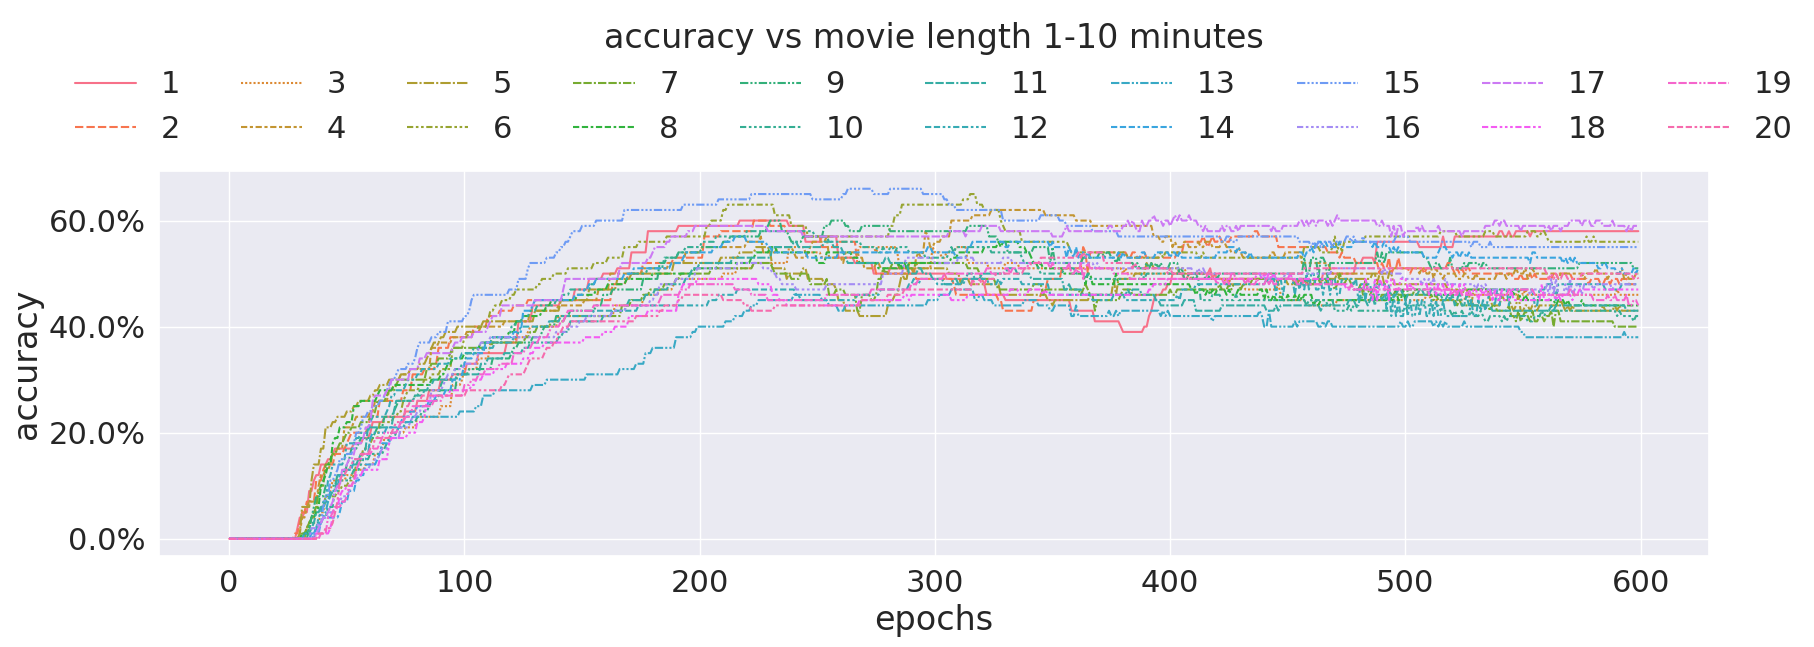

<Figure size 2000x500 with 0 Axes>

In [28]:
plt.rcParams['figure.figsize'] = [20, 5]
sns.set(font_scale=2)
ax = sns.lineplot(data=acc_data_df)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=10, title="accuracy vs movie length 1-20 minutes", frameon=False,
)
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.1)
ax.set(xlabel ="epochs", ylabel = "accuracy")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# ax.set(title='accuracy vs movie length 1-10 minutes')


In [12]:
max_acc = pd.DataFrame(acc_data_df.max()).T
max_acc

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.6,0.6,0.55,0.62,0.55,0.65,0.52,0.56,0.6,0.58,0.56,0.5,0.47,0.57,0.66,0.53,0.61,0.5,0.52,0.54


/tmp/ipykernel_1041517/3381012326.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(['{:,.1%}'.format(x) for x in vals])


[Text(0.5, 1.0, 'accuracy vs movie length 1-20 minutes')]

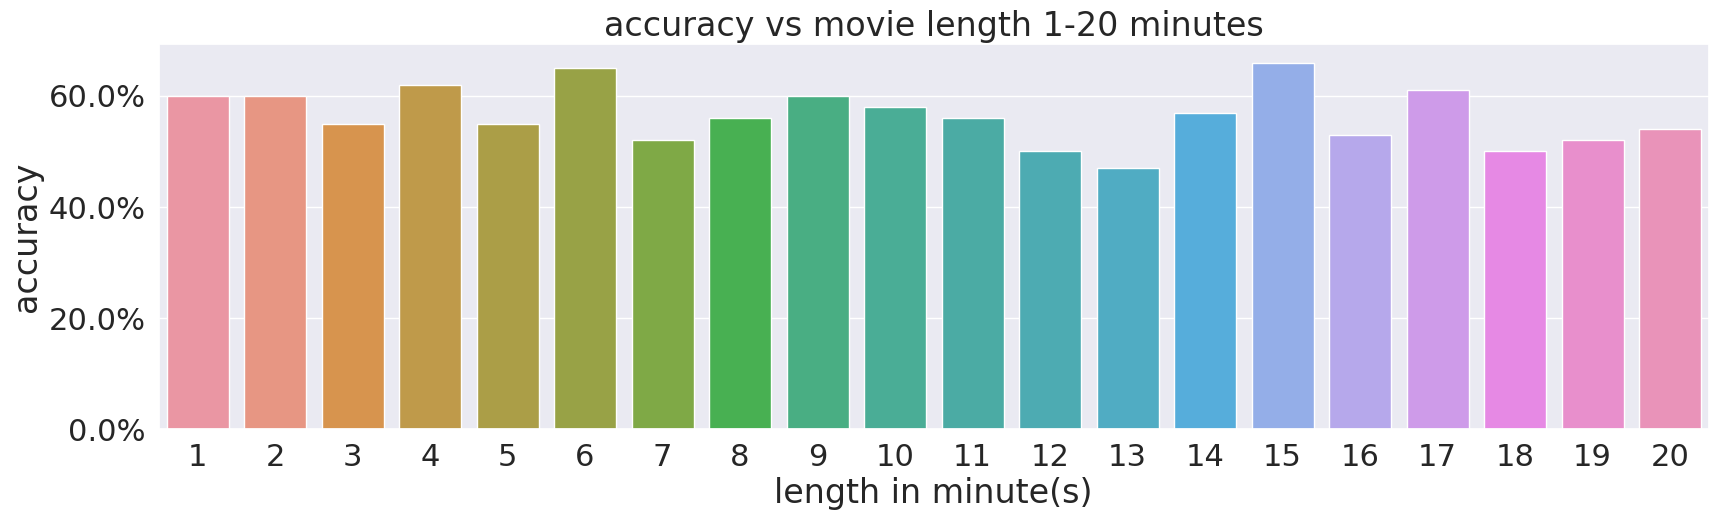

In [31]:
# names = list(sorted_value_rnn_valid_acc.keys())
# values = list(sorted_value_rnn_valid_acc.values())

plt.rcParams['figure.figsize'] = [20, 5]
a = sns.barplot(data=max_acc)
a.set(xlabel ="length in minute(s)", ylabel = "accuracy")
vals = a.get_yticks()
a.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
a.set(title='accuracy vs movie length 1-20 minutes')

In [14]:
maxLength

20

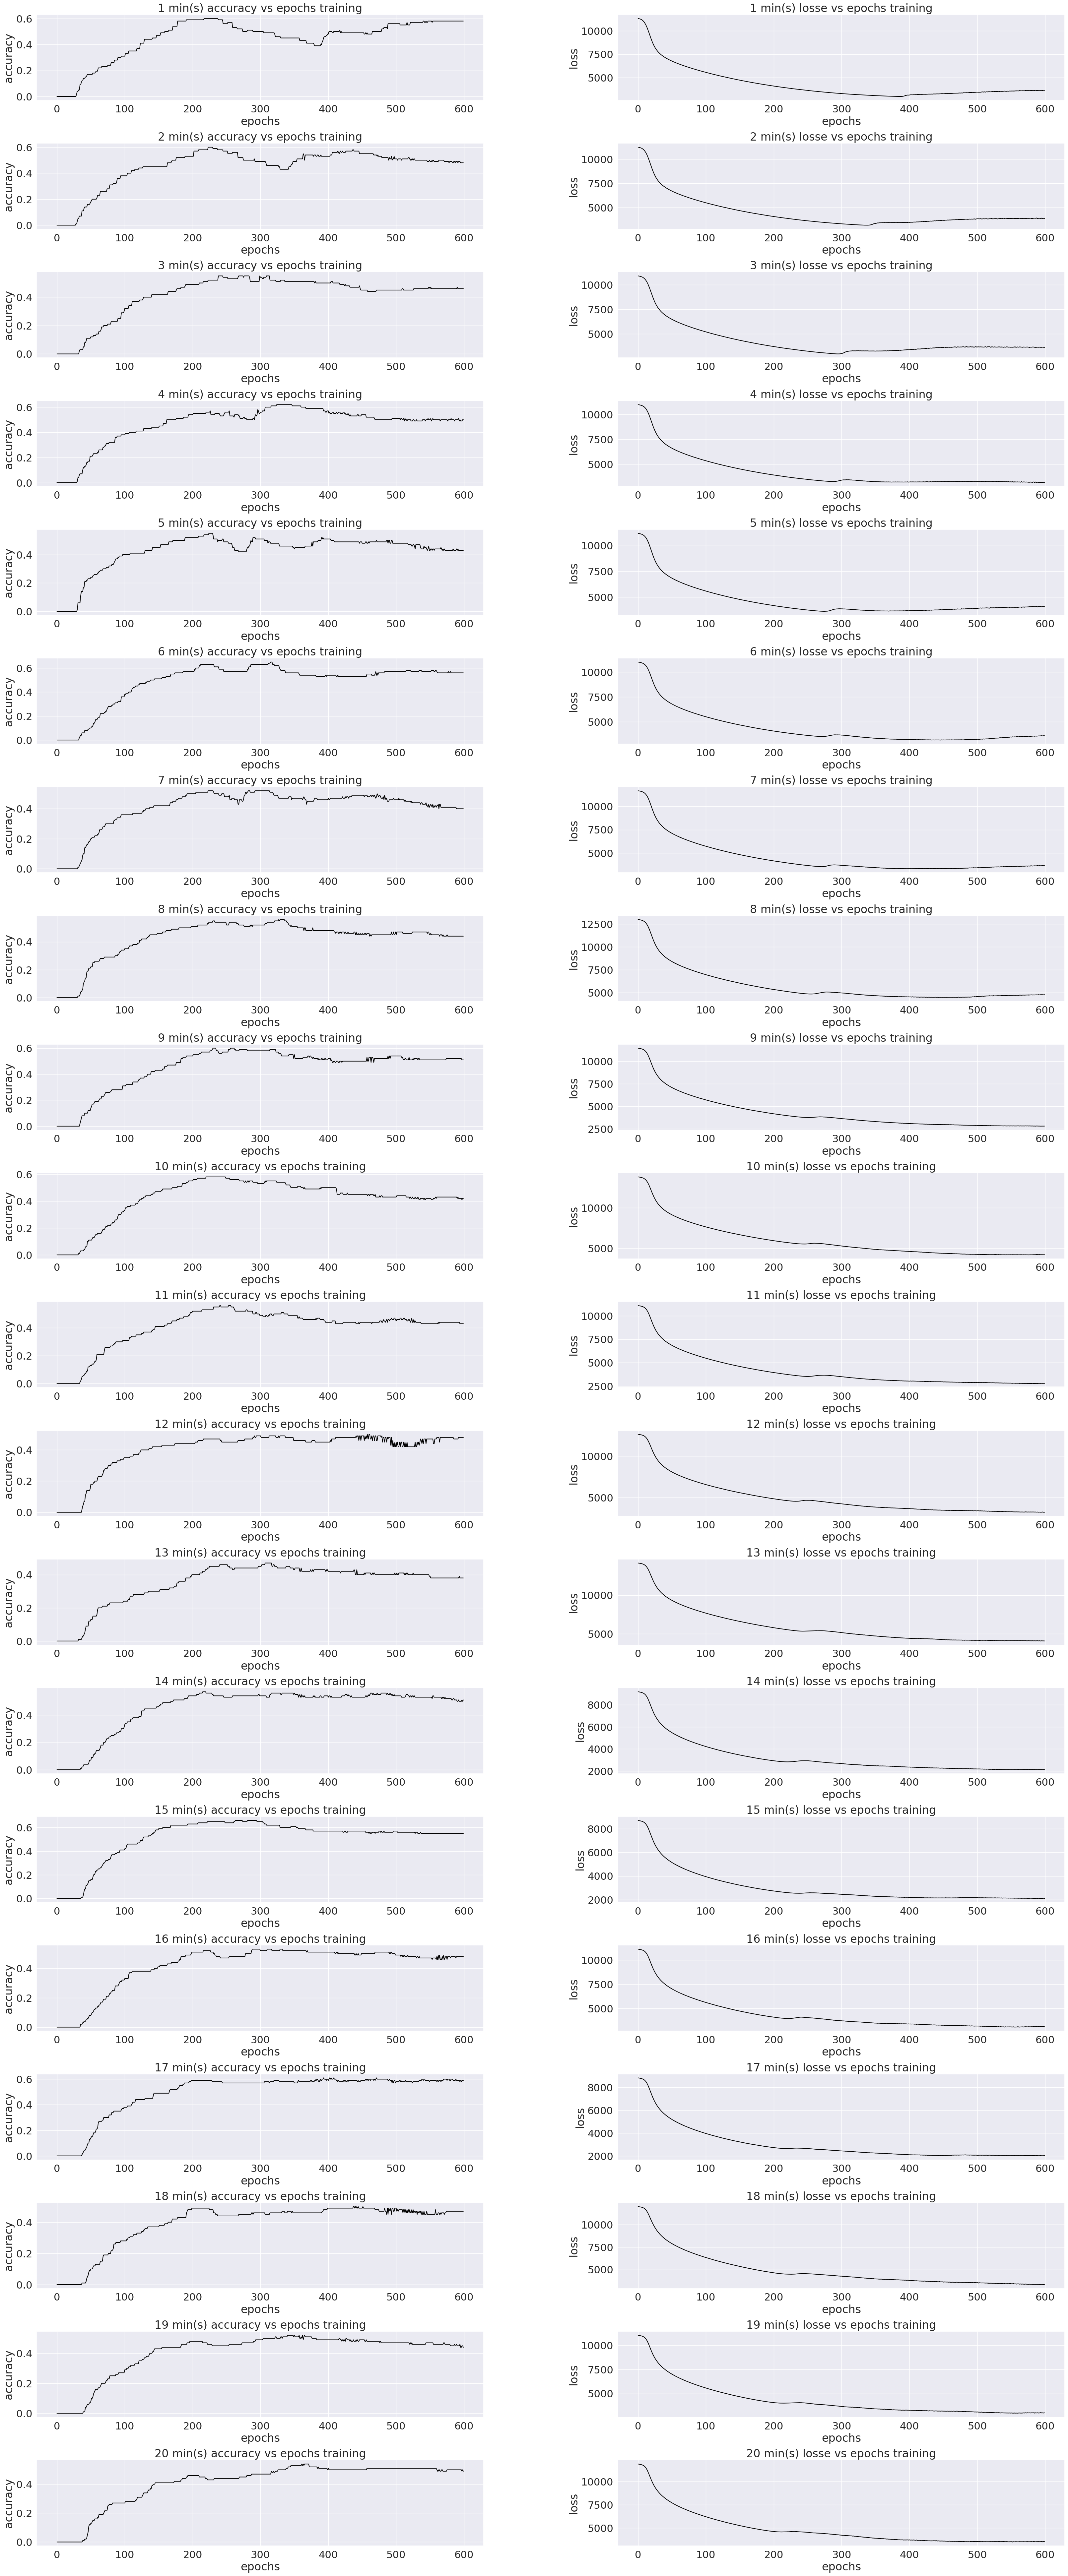

In [30]:
plt.rcParams['figure.figsize'] = [40, 10*maxLength]
graph = 1
fig = plt.figure()

fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.tight_layout()
for i in range(1, maxLength+1):
    plt.subplot(2*maxLength, 2, graph)
    plt.title(f'{i} min(s) accuracy vs epochs training')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.plot(list(range(len(resultes[f"{i}"]["accuracy_val"][:]))), resultes[f"{i}"]["accuracy_val"][:], '-', color='black', )
    graph += 1
    plt.subplot(2*maxLength, 2, graph)
    plt.title(f'{i} min(s) losse vs epochs training')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.plot(list(range(len(resultes[f"{i}"]["loss_val"])))[:], resultes[f"{i}"]["loss_val"][:], '-', color='black')
    graph += 1
# plt.suptitle("test")
plt.rcParams['figure.figsize'] = defultePlotSize